# **3. Cost Function and Gradient Descent**

Recall that the Gradient Descent method computes the best fitting line based on the MSE. The aim is to find the best possible

$$ \hat{\beta_0} $$ and $$ \hat{\beta_1} $$ that best fit the equation:

$$ Y = \beta_0 + \beta_1 X $$ such that we have

$$ \hat{Y} = \hat{\beta_0} + \hat{\beta_1} X $$

The Gradient Descent method requires the following parameters as inputs:

1. X vector of inputs
2. Y vector of outputs
3. Number of iterations
4. Learning Rate $\alpha$ (step size)

Based on the above, the Gradient Descent Method looks to find the optimal parameter vector theta, by iteratively minimizing the MSE, which is also known as the cost function.This results in the best fit line for the data.

The way that it works is:

1. Start with initial values for the parameter vector $\tilde{\theta}$
2. Loop through a set number of iterations:
    * Calculate predicted values $\hat{Y}$ using the current parameters such that $\hat{Y} = \tilde{\beta_0} + \tilde{\beta_1}X$. Convention is to start at 0.
    * Compute the error/MSE between predicted and actual values
    * Compute the gradients of the error/MSE w.r.t parameters     
    * Update the parameters by moving in the direction, scaled by the learning rate lambda
3. Repeat the loop until the value stabilizes around a certain point.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import math

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])



In [ ]:
# 1. Set up beta_0 = beta_1 = 0
beta_0_curr = beta_1_curr = 0

# 2. Set up number of iterations
iterations = 1000

# 3. Set up learning rate
alpha = 0.001

# 4. Get the length of the vectors, n
n = len(x)

In [ ]:
# Initialize for loop
for i in range(iterations):
  y_pred = beta_0_curr + beta_1_curr*x

  # Calculate Cost
  cost = 0
  for val in (y - y_pred):
    cost = cost + (val**2)
  cost = cost/n

  # Calculate gradients of Beta_0 and Beta_1
  beta_0_d = -2/n * sum(y - y_pred)
  beta_1_d = -2/n * sum(x * (y - y_pred))

  # Update beta_0_curr and beta_1_curr
  beta_0_curr = beta_0_curr - alpha * beta_0_d
  beta_1_curr = beta_1_curr - alpha * beta_1_d

  print("beta_0: {}, beta_1: {}, iteration: {}, cost: {}".format(beta_0_curr, beta_1_curr, iterations, cost))

# The cost seems to have stabilized at around 0.9 at 1000 iterations.

beta_0: 0.7396846318529557, beta_1: 2.37398072619568, iteration: 100, cost: 1.6104664905993602
beta_0: 0.7419613782320758, beta_1: 2.3793150424282574, iteration: 100, cost: 1.5756166858407137
beta_0: 0.7442015652210421, beta_1: 2.384518343225443, iteration: 100, cost: 1.54236923920818
beta_0: 0.7464060520312473, beta_1: 2.389593730283157, iteration: 100, cost: 1.5106492366459168
beta_0: 0.7485756775454859, beta_1: 2.39454423190474, iteration: 100, cost: 1.480385267360628
beta_0: 0.7507112607989666, beta_1: 2.399372804737563, iteration: 100, cost: 1.451509259995286
beta_0: 0.7528136014489433, beta_1: 2.4040823354685426, iteration: 100, cost: 1.4239563264639974
beta_0: 0.7548834802332341, beta_1: 2.408675642479541, iteration: 100, cost: 1.3976646130897732
beta_0: 0.7569216594178905, beta_1: 2.4131554774635915, iteration: 100, cost: 1.3725751587036727
beta_0: 0.7589288832342731, beta_1: 2.417524527002885, iteration: 100, cost: 1.3486317593797894
beta_0: 0.7609058783057873, beta_1: 2.42178

Let's wrap all of that up inside a function called gradient_descent. We'll also incorporate math.is.close to ensure that the loop stops when changes in $ \tilde{\beta_0} $ and $ \tilde{\beta_1} $ are sufficiently small.


In [ ]:
def gradient_descent(x, y, beta_0_curr, beta_1_curr, alpha, iterations, tolerance=1e-7):
    n = len(x)

    for i in range(iterations):
        # Calculate predicted values
        y_pred = beta_0_curr + beta_1_curr * x

        # Calculate Cost (Mean Squared Error)
        cost = np.mean((y - y_pred) ** 2)  # More concise way to calculate MSE

        # Calculate gradients of Beta_0 and Beta_1
        beta_0_d = (-2/n) * sum(y - y_pred)  # Gradient w.r.t. beta_0
        beta_1_d = (-2/n) * sum(x * (y - y_pred))  # Gradient w.r.t. beta_1

        # Calculate the next values of beta_0 and beta_1
        beta_0_next = beta_0_curr - alpha * beta_0_d
        beta_1_next = beta_1_curr - alpha * beta_1_d

        # Check for convergence using math.isclose
        if math.isclose(beta_0_curr, beta_0_next, rel_tol=tolerance) and math.isclose(beta_1_curr, beta_1_next, rel_tol=tolerance):
            break  # Stop if changes are sufficiently small

        # Update current values for the next iteration
        beta_0_curr = beta_0_next
        beta_1_curr = beta_1_next

        # Print the cost for every iteration (optional)
        print("Iteration {}: beta_0: {}, beta_1: {}, cost: {}".format(i, beta_0_curr, beta_1_curr, cost))


    # Print final values of beta_0 and beta_1
    print(f"Final beta_0: {beta_0_curr}, Final beta_1: {beta_1_curr}")




In [ ]:
# Let's apply this
gradient_descent(np.array([1, 2, 3, 4, 5]),
                 np.array([40000, 50000, 60000, 70000, 80000]),
                 0, 0, 0.001, 1000)

Iteration 0: beta_0: 120.0, beta_1: 400.0, cost: 3800000000.0
Iteration 1: beta_0: 237.36, beta_1: 790.48, cost: 3627662400.0
Iteration 2: beta_0: 352.1424, beta_1: 1171.6652800000002, cost: 3463380354.7008004
Iteration 3: beta_0: 464.40812352, beta_1: 1543.7757894400002, cost: 3306777157.223985
Iteration 4: beta_0: 574.21665253632, beta_1: 1907.0262733312002, cost: 3157493716.98052
Iteration 5: beta_0: 681.6260615912602, beta_1: 2261.626395402696, cost: 3015187735.863969
Iteration 6: beta_0: 786.6930510956615, beta_1: 2607.780858334289, cost: 2879532922.96815
Iteration 7: beta_0: 889.4729798434645, beta_1: 2945.6895211443607, cost: 2750218246.0276804
Iteration 8: beta_0: 990.0198967569114, beta_1: 3275.547513800124, cost: 2626947217.864084
Iteration 9: beta_0: 1088.3865718805969, beta_1: 3597.5453491159797, cost: 2509437216.200488
Iteration 10: beta_0: 1184.6245266421397, beta_1: 3911.8690320041446, cost: 2397418835.284449
Iteration 11: beta_0: 1278.7840633968306, beta_1: 4218.7001661

Let's apply this on a new dataset from

https://github.com/codebasics/py/blob/master/ML/3_gradient_descent/Exercise/test_scores.csv

In [ ]:
# Use the raw URL to read the CSV file
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/3_gradient_descent/Exercise/test_scores.csv'
df = pd.read_csv(url)
df.head(10)

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [ ]:
# Subset X and Y
X = df['math'].values
Y = df['cs'].values

In [ ]:
# Apply the gradient descent function
gradient_descent(X, Y, 0, 0, 0.0001, 1000)

Iteration 0: beta_0: 0.013980000000000001, beta_1: 0.9891800000000002, cost: 5199.1
Iteration 1: beta_0: 0.0147417592, beta_1: 1.0416176032, cost: 46.3330473650399
Iteration 2: beta_0: 0.014802799669408, beta_1: 1.0443971065873279, cost: 31.85264986355831
Iteration 3: beta_0: 0.014826693765467417, beta_1: 1.0445441606668626, cost: 31.81195205936781
Iteration 4: beta_0: 0.014848618440205038, beta_1: 1.0445516647187705, cost: 31.81183294335848
Iteration 5: beta_0: 0.014870438475874223, beta_1: 1.0445517710206773, cost: 31.8118278623733
Iteration 6: beta_0: 0.0148922527273428, beta_1: 1.0445514851602624, cost: 31.811823101960226
Iteration 7: beta_0: 0.014914066435056226, beta_1: 1.0445511785140886, cost: 31.811818342556997
Iteration 8: beta_0: 0.01493587987682099, beta_1: 1.0445508707693771, cost: 31.811813583265547
Iteration 9: beta_0: 0.014957693067366749, beta_1: 1.0445505629697767, cost: 31.811808824083368
Iteration 10: beta_0: 0.014979506007477059, beta_1: 1.044550255170612, cost: 31

Let's visualize them.

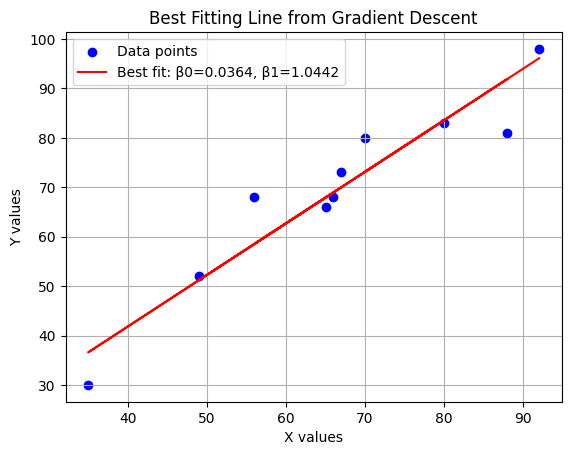

In [ ]:
# Final beta values
final_beta_0 = 0.03643038673891087
final_beta_1 = 1.0442475648018756

# Create a scatter plot for the data points
plt.scatter(X, Y, color='blue', label='Data points')

# Plot the best fitting line using the final beta values
plt.plot(X, final_beta_0 + final_beta_1 * X, color='red', label=f'Best fit: β0={final_beta_0:.4f}, β1={final_beta_1:.4f}')

# Customize the final plot
plt.title('Best Fitting Line from Gradient Descent')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.grid(True)
plt.show()